In [200]:
from helper import *

## Get Some Data

link:  https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [201]:
walk_through_dir(dir_path='data/10_food_classes_10_percent/')

There are 2 directories and 0 images in 'data/10_food_classes_10_percent/'.
There are 10 directories and 0 images in 'data/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/ramen'.
There are 0 direct

In [202]:
train_dir = 'data/10_food_classes_10_percent/train/'
test_dir = 'data/10_food_classes_10_percent/test/'

In [203]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE
                                                                            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE
                                                                )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [204]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [205]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [206]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

2023-04-15 01:40:33.779884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]
2023-04-15 01:40:33.781415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [750]
	 [[{{node Placeholder/_4}}]]


tf.Tensor(
[[[[2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   ...
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]]

  [[2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   ...
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]]

  [[2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   ...
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2.47000000e+02 2.34000000e+02 2.18000000e+02]]

  ...

  [[2.47000000e+02 2.34000000e+02 2.18000000e+02]
   [2

## Model 0: Building a transfer learning model using the Keras Functional API

# Create the base model with tf.keras.application

In [207]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze layers in the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# If using ResNet50V2 you will need to normalize input
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) (this is for ResNet, for Efficient - embedded)

# Pass the inputes to the base model
x = base_model(inputs)
print(f'Shape after passing through base model: {x.shape}')

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)


# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Shape after passing through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [24]:
# Fit the model
EPOCHS = 5
history_model_0 = model_0.fit(train_data_10_percent,
                epochs=EPOCHS,
                steps_per_epoch=len(train_data_10_percent),
                validation_data=test_data,
                validation_steps=int(0.25 * len(test_data)),
                callbacks=[create_tensorboard_callback(dir_name='transfer_learning', 
                                                       experiment_name='model_0'
                                                       )]
                )

Saving TensorBoard log files to: transfer_learning/model_0/20230413-214155
Epoch 1/5


2023-04-13 21:41:55.545086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]
2023-04-13 21:41:55.545775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - ETA: 0s - loss: 1.9083 - accuracy: 0.4240

2023-04-13 21:42:27.245483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]
2023-04-13 21:42:27.246037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 51s 2s/step - loss: 1.9083 - accuracy: 0.4240 - val_loss: 1.2848 - val_accuracy: 0.7451
Epoch 2/5
24/24 [==============================] - 41s 2s/step - loss: 1.1073 - accuracy: 0.7667 - val_loss: 0.8124 - val_accuracy: 0.8388
Epoch 3/5
24/24 [==============================] - 41s 2s/step - loss: 0.7918 - accuracy: 0.8293 - val_loss: 0.6573 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - 40s 2s/step - loss: 0.6553 - accuracy: 0.8507 - val_loss: 0.5755 - val_accuracy: 0.8602
Epoch 5/5
24/24 [==============================] - 36s 2s/step - loss: 0.5407 - accuracy: 0.8853 - val_loss: 0.5270 - val_accuracy: 0.8651


In [25]:
# Evaluate on the full test_data
model_0.evaluate(test_data)

79/79 [==============================] - 69s 870ms/step - loss: 0.5591 - accuracy: 0.8580


[0.5590512156486511, 0.8579999804496765]

In [26]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_2
1 rescaling_2
2 normalization_1
3 rescaling_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [27]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

In [28]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


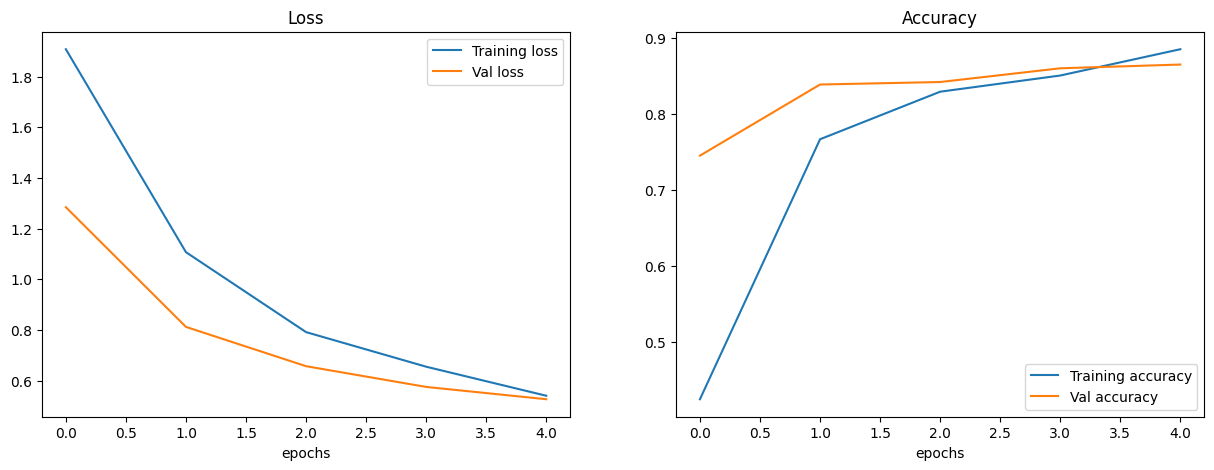

In [29]:
plot_loss_function(history_model_0)


## Getting feature vector from a trained model

We have a tensor with the form of (1, 4, 4, 3) and then pass it to GlobalAveragePoling2D

In [46]:
inpute_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(inpute_shape)
print(f'Random input tensor: \n{input_tensor}\n')

Random input tensor: 
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]



In [47]:
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'Global average 2D pooled random tensor: \n {global_average_pooled_tensor}\n')
print(f'Shape of input_tensor: {input_tensor.shape}')
print(f'Shape of averaged vector: {global_average_pooled_tensor.shape}')

Global average 2D pooled random tensor: 
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input_tensor: (1, 4, 4, 3)
Shape of averaged vector: (1, 3)


## Running a series of transfer learning experiments

1. 'model_1' - feature extraction transfer learning with 1% of training data with data augmentation

2. 'model_2' - feature extraction transfer learning with 10% of training data with data augmentation

3. 'model_3' - use fine-tuning transfer learning on 10% of the training data with data augmentation

4. 'model_4' - use fine-tuning transfer learning on 100% of the training data with data augmentation


### Model 3

In [68]:
train_dir_1_percent = 'data/10_food_classes_1_percent/train'
test_dir_1_percent = 'data/10_food_classes_1_percent/test'


In [70]:
walk_through_dir('data/10_food_classes_1_percent/')

There are 2 directories and 0 images in 'data/10_food_classes_1_percent/'.
There are 10 directories and 0 images in 'data/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 2

In [71]:
# Setup data loaders
IMG_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

In [91]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255)
], name="data_augmentation")

### Visualize our data augmenatation layer

Text(0.5, 1.0, 'Augmented')

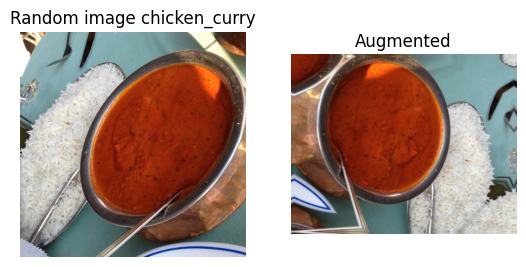

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = 'data/10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image


img = mpimg.imread(random_image_path)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f'Random image {target_class}')
plt.axis('off');

augmented_img = data_augmentation(img)
plt.subplot(1, 2, 2)
plt.imshow(augmented_img / 255.)
plt.axis('off')
plt.title('Augmented')


## Model 1: Feature extraction transfer learning with 1% of the sata with data augmentation

In [110]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape)

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [111]:
history_model_1 = model_1.fit(train_data_1_percent,
                              epochs=EPOCHS,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data_1_percent,
                              validation_steps=int(0.25 * len(test_data_1_percent)),
                              callbacks=[create_tensorboard_callback(dir_name='Ttransfer_learning',
                                                                     experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: Ttransfer_learning/1_percent_data_aug/20230414-122723
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.4692 - accuracy: 0.0857

2023-04-14 12:27:32.957895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]
2023-04-14 12:27:32.958742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]


3/3 [==============================] - 28s 10s/step - loss: 2.4692 - accuracy: 0.0857 - val_loss: 2.2003 - val_accuracy: 0.1332
Epoch 2/5
3/3 [==============================] - 19s 9s/step - loss: 2.2080 - accuracy: 0.1571 - val_loss: 2.0907 - val_accuracy: 0.2632
Epoch 3/5
3/3 [==============================] - 19s 9s/step - loss: 2.0305 - accuracy: 0.3143 - val_loss: 1.9754 - val_accuracy: 0.3388
Epoch 4/5
3/3 [==============================] - 19s 9s/step - loss: 1.8340 - accuracy: 0.5000 - val_loss: 1.8564 - val_accuracy: 0.4293
Epoch 5/5
3/3 [==============================] - 19s 9s/step - loss: 1.6345 - accuracy: 0.6429 - val_loss: 1.7618 - val_accuracy: 0.4885


In [112]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [114]:
results_1_percent_data_aug = model_1.evaluate(test_data_1_percent)

79/79 [==============================] - 72s 900ms/step - loss: 1.7849 - accuracy: 0.4628


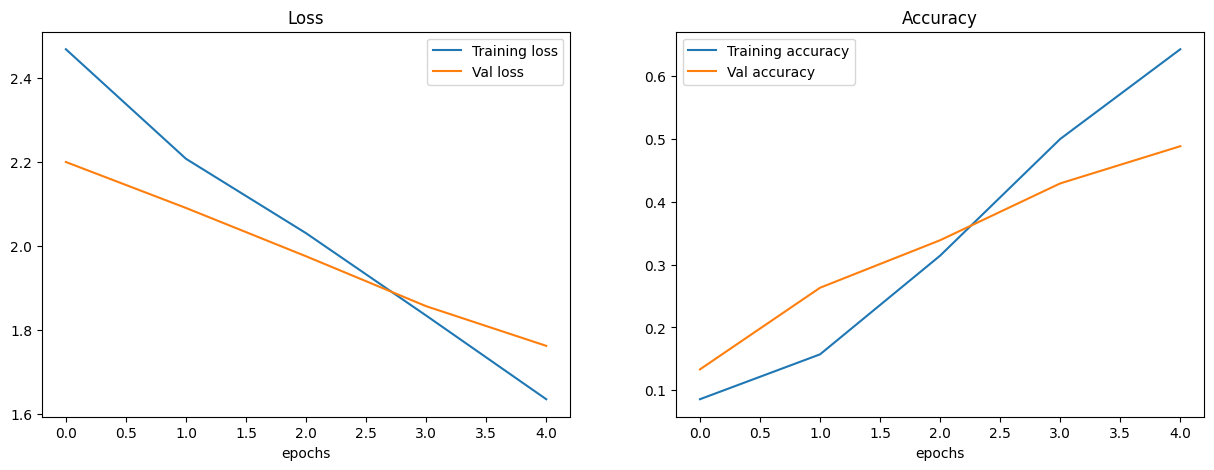

In [115]:
plot_loss_function(history_model_1)

## Model 2: feature extraction transfer learning model with 10% of data and data augmentation

In [208]:
train_dir_10_percent = 'data/10_food_classes_10_percent/train'
test_dir_10_percent = 'data/10_food_classes_10_percent/test/'

In [209]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [210]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name='data_augmentation')

In [211]:
input_shape = (224, 224, 3)

# Create a frozen base model (backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create an inputs and outputs (including layers in between)

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs) # augment our data images
x = base_model(x, training=False) # pass augmanted images to the base model but keep it in inference mode
x = layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [212]:
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating a ModelCheckPoint callback

In [213]:
# Set checkpoint path
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.checkpoint.ckpt'

# Create a model checkpoint callback that saves weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)

### Fit Model 2

In [214]:
initial_epochs = 5
history_model_2 = model_2.fit(train_data_10_percent,
                              epochs=initial_epochs,
                              validation_data=test_data_10_percent,
                              validation_steps=int(0.25 * len(test_data_10_percent)),
                              callbacks=[create_tensorboard_callback(dir_name='transfer_learning', 
                                                                     experiment_name='10_percent_data_aug') ,
                                         checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230415-014140


Epoch 1/5


2023-04-15 01:41:40.412905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [750]
	 [[{{node Placeholder/_4}}]]
2023-04-15 01:41:40.413327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - ETA: 0s - loss: 1.9662 - accuracy: 0.3667

2023-04-15 01:42:09.283767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]
2023-04-15 01:42:09.284320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]



Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.checkpoint.ckpt
24/24 [==============================] - 49s 2s/step - loss: 1.9662 - accuracy: 0.3667 - val_loss: 1.4410 - val_accuracy: 0.6299
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2966 - accuracy: 0.6893
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.checkpoint.ckpt
24/24 [==============================] - 41s 2s/step - loss: 1.2966 - accuracy: 0.6893 - val_loss: 0.9875 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9854 - accuracy: 0.7867
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.checkpoint.ckpt
24/24 [==============================] - 40s 2s/step - loss: 0.9854 - accuracy: 0.7867 - val_loss: 0.7939 - val_accuracy: 0.8141
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.8040
Epoch 4: saving model to ten_percent_model_checkpoints_weights/

In [215]:
model_0.evaluate(test_data)

2023-04-15 01:46:27.086111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]
2023-04-15 01:46:27.086844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 72s 858ms/step - loss: 2.3603 - accuracy: 0.1100


[2.360264778137207, 0.10999999940395355]

In [131]:
model_2.evaluate(test_data)

79/79 [==============================] - 69s 867ms/step - loss: 0.5809 - accuracy: 0.8516


[0.580908477306366, 0.8515999913215637]

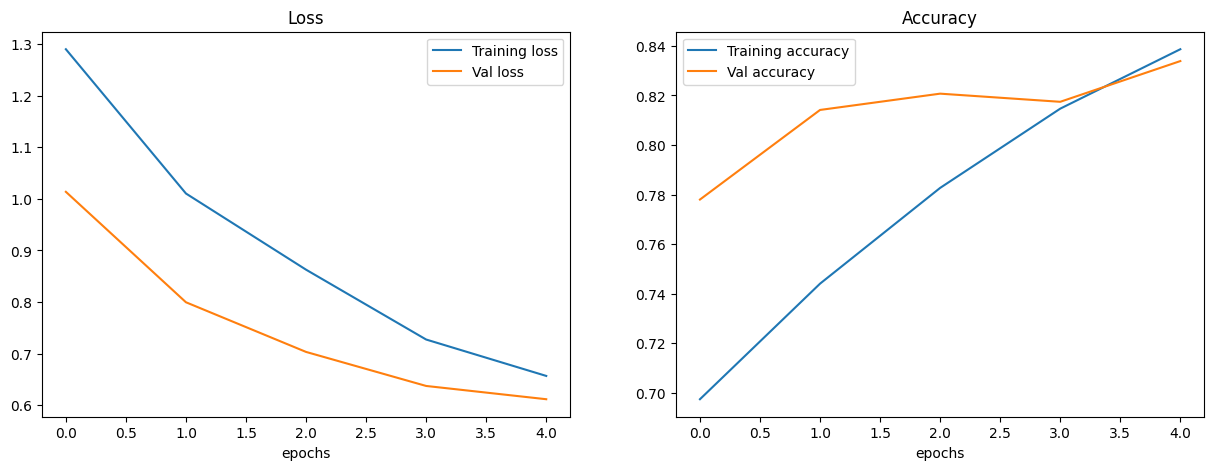

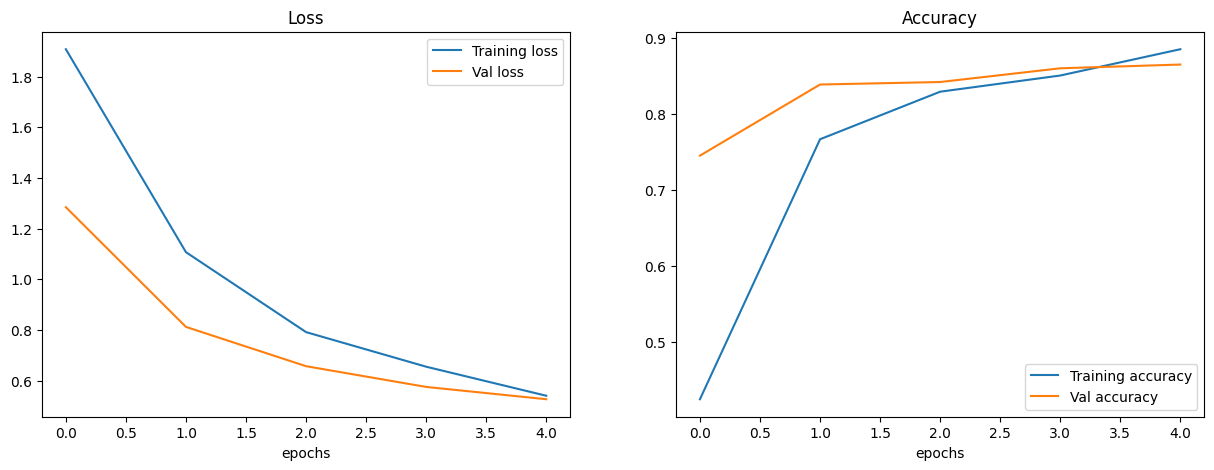

In [133]:
plot_loss_function(history_model_2)
plot_loss_function(history_model_0)

### Loading in checkpoint weights

In [199]:
# Load in saved model weghts and evaluate model
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [135]:
# Evaluate model 2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 69s 864ms/step - loss: 0.5809 - accuracy: 0.8516


## Model 3: Fine-tuning an existing model on 10% of data

In [156]:
model_2.layers

In [157]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x143cc8410> True
<keras.engine.sequential.Sequential object at 0x142c94690> True
<keras.engine.functional.Functional object at 0x144a5c890> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x144a9c390> True
<keras.layers.core.dense.Dense object at 0x144ac8e90> True


In [158]:
for idx, layer in enumerate(model_2.layers[2].layers):
    print(idx + 1, layer.name, layer.trainable)

1 input_12 False
2 rescaling_16 False
3 normalization_8 False
4 rescaling_17 False
5 stem_conv_pad False
6 stem_conv False
7 stem_bn False
8 stem_activation False
9 block1a_dwconv False
10 block1a_bn False
11 block1a_activation False
12 block1a_se_squeeze False
13 block1a_se_reshape False
14 block1a_se_reduce False
15 block1a_se_expand False
16 block1a_se_excite False
17 block1a_project_conv False
18 block1a_project_bn False
19 block2a_expand_conv False
20 block2a_expand_bn False
21 block2a_expand_activation False
22 block2a_dwconv_pad False
23 block2a_dwconv False
24 block2a_bn False
25 block2a_activation False
26 block2a_se_squeeze False
27 block2a_se_reshape False
28 block2a_se_reduce False
29 block2a_se_expand False
30 block2a_se_excite False
31 block2a_project_conv False
32 block2a_project_bn False
33 block2b_expand_conv False
34 block2b_expand_bn False
35 block2b_expand_activation False
36 block2b_dwconv False
37 block2b_bn False
38 block2b_activation False
39 block2b_se_squeeze 

In [159]:
# How many trainable variables in our base model?
print(len(model_2.layers[2].trainable_variables))

10


In [160]:
# Make last 10 layers of our base_model.trainable = True
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model everytime the change is done
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning learning rate should be lower not to change already learned pattern too much
    metrics=['accuracy']
)

In [198]:
model_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [197]:
len(model_2.trainable_variables)

12

In [163]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_3 = model_2.fit(train_data_10_percent,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              initial_epoch=history_model_2.epoch[-1],
                              callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                     experiment_name='10_percent_fine_tune_layers')]) 

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_layers/20230414-235344


Epoch 5/10
24/24 [==============================] - 71s 3s/step - loss: 0.5698 - accuracy: 0.8440 - val_loss: 0.4457 - val_accuracy: 0.8651
Epoch 6/10
24/24 [==============================] - 41s 2s/step - loss: 0.4724 - accuracy: 0.8667 - val_loss: 0.4690 - val_accuracy: 0.8586
Epoch 7/10
24/24 [==============================] - 46s 2s/step - loss: 0.4186 - accuracy: 0.8760 - val_loss: 0.4398 - val_accuracy: 0.8569
Epoch 8/10
24/24 [==============================] - 41s 2s/step - loss: 0.3736 - accuracy: 0.8907 - val_loss: 0.4261 - val_accuracy: 0.8717
Epoch 9/10
24/24 [==============================] - 38s 2s/step - loss: 0.3333 - accuracy: 0.9133 - val_loss: 0.4228 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 39s 2s/step - loss: 0.3106 - accuracy: 0.9093 - val_loss: 0.4522 - val_accuracy: 0.8520


In [164]:
# Evaluate the fine-tuned model (model_3 or model_2 with 10 new layers from base_model)
results_fine_tuned_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 67s 840ms/step - loss: 0.4274 - accuracy: 0.8576


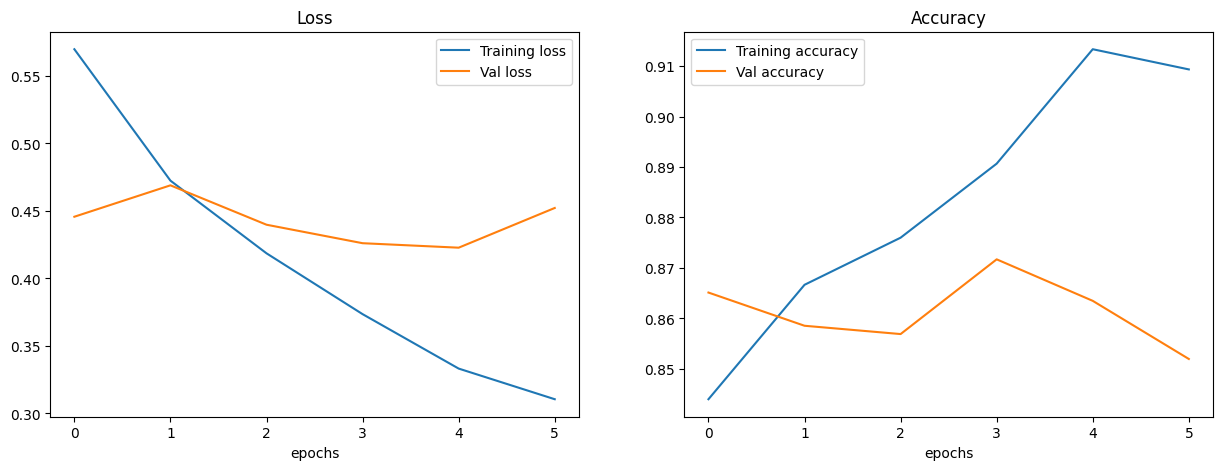

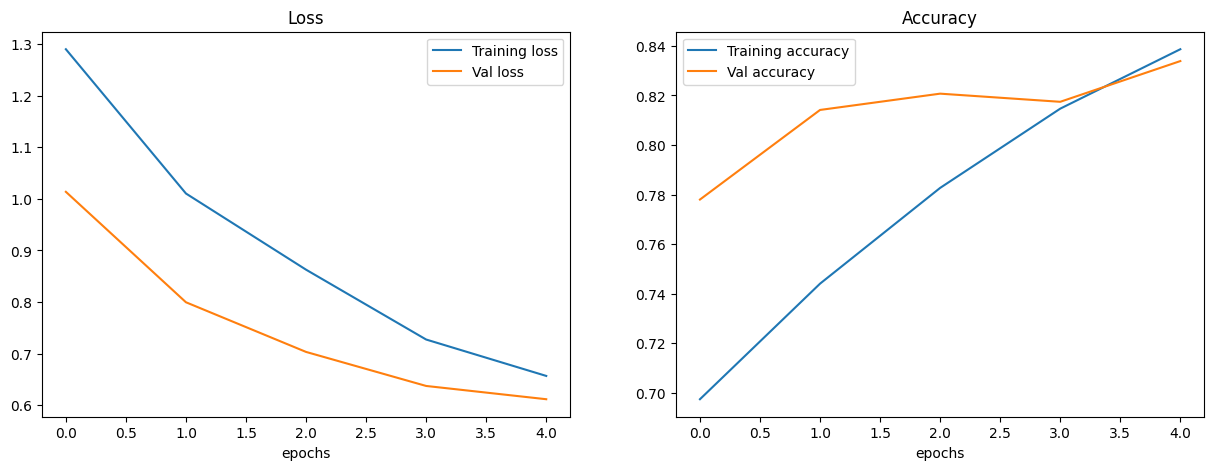

In [166]:
plot_loss_function(history_model_3)
plot_loss_function(history_model_2)

In [185]:
def compare_histories(original_history, new_history, initial_epochs=5):
    acc = original_history.history['accuracy']
    loss = original_history.history['loss']

    val_acc = original_history.history['val_accuracy']
    val_loss = original_history.history['val_loss']

    total_acc = acc + new_history.history['accuracy']
    total_loss = loss + new_history.history['loss']

    total_val_acc = val_acc + new_history.history['val_accuracy']
    total_val_loss = val_loss + new_history.history['val_loss']

    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(total_loss, label='Training Accuracy')
    plt.plot(total_val_loss, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Accuracy')


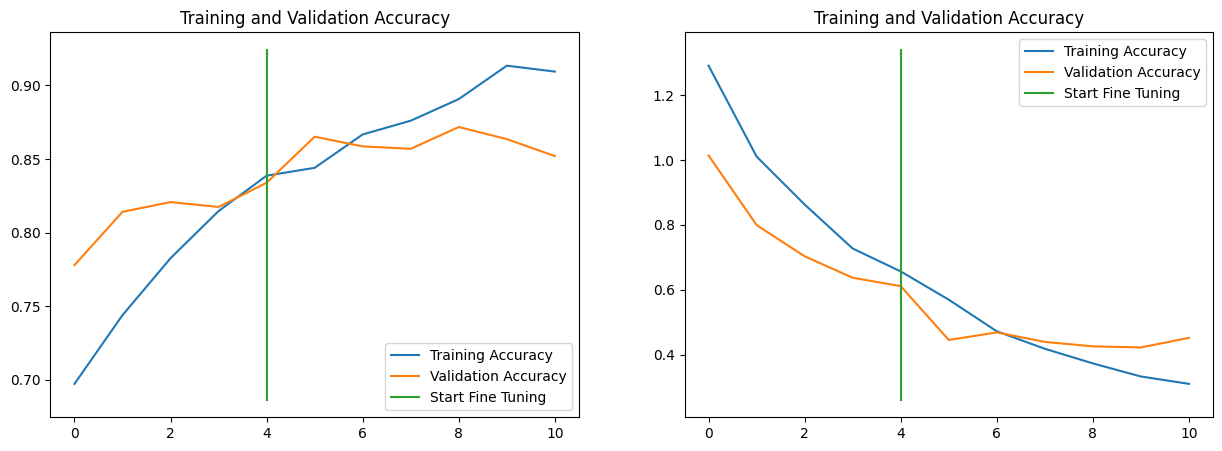

In [186]:
compare_histories(history_model_2,
                  history_model_3,
                  initial_epochs=5)

# Model 4: Fine-tuning and existing model on all of the data

In [216]:
train_dir_all = 'data/10_food_classes_all_data/train'
test_dir_all = 'data/10_food_classes_all_data/test'

In [217]:
walk_through_dir(dir_path='data/10_food_classes_all_data')

There are 2 directories and 0 images in 'data/10_food_classes_all_data'.
There are 10 directories and 0 images in 'data/10_food_classes_all_data/test'.
There are 0 directories and 417 images in 'data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 327 images in 'data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 500 images in 'data/10_food_classes_all_data/test/steak'.
There are 0 directories and 441 images in 'data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 329 images in 'data/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 500 images in 'data/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 500 images in 'data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 500 images in 'data/10_food_classes_all_data/test/pizza'.
There are 0 directories and 500 images in 'data/10_food_classes_all_data/test/ramen'.
There are 0 directories and 500 images in

In [218]:
IMG_SIZE = (224, 224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                    label_mode='categorical',
                                                                    image_size=IMG_SIZE)

test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                    label_mode='categorical',
                                                                    image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [219]:
model_2.evaluate(test_data)

79/79 [==============================] - 68s 851ms/step - loss: 0.6288 - accuracy: 0.8388


[0.6288432478904724, 0.8388000130653381]

In [193]:
model_2.evaluate(test_data_all)

2023-04-15 00:55:09.918063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]
2023-04-15 00:55:09.919010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 69s 864ms/step - loss: 0.4274 - accuracy: 0.8576


[0.4273626506328583, 0.8575999736785889]

To train a fine-tuning model we need to revert model_2 back to its feature extraction weights

In [220]:
model_2.load_weights(checkpoint_path)

In [222]:
for idx, layer in enumerate(model_2.layers):
    print(idx, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 False
3 global_average_pooling_2D True
4 output_layer True


In [234]:
# Make last 10 layers of our base_model.trainable = True
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model everytime the change is done
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning learning rate should be lower not to change already learned pattern too much
    metrics=['accuracy']
)


In [235]:
for idx, layer in enumerate(model_2.layers[2].layers):
    print(idx, layer.name, layer.trainable)

0 input_14 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [240]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

history_10_classes_full = model_2.fit(
    train_data_all,
    epochs=fine_tune_epochs,
    validation_data=test_data_all,
    validation_steps=int(0.25 * len(test_data_all)),
    initial_epoch=history_model_2.epoch[-1],
    callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                           experiment_name='full_10_classes_fine_tune_last_10')]
)

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230415-020930


Epoch 5/10


KeyboardInterrupt: 